In [187]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#https://www.linkedin.com/pulse/creating-dashboard-matplotlib-library-leonardo-a/
#http://datos.munimadrid.es/portal/site/egob/menuitem.c05c1f754a33a9fbe4b2e4b284f1a5a0/?vgnextoid=39cddd906cbee510VgnVCM1000001d4a900aRCRD&vgnextchannel=374512b9ace9f310VgnVCM100000171f5a0aRCRD&vgnextfmt=default#

In [188]:
# Ajout du fichier 
file2017 = 'Datas/VEHICULOS_PARQUE_MOVIL_2017.csv'
file2018 = 'Datas/VEHICULOS_PARQUE_MOVIL_2018.csv'
file2019 = 'Datas/VEHICULOS_PARQUE_MOVIL_2019.csv'
file2020 = 'Datas/VEHICULOS_PARQUE_MOVIL_2020.csv'
file2021 = 'Datas/VEHICULOS_PARQUE_MOVIL_2021.csv'

#Variables waiting the main function to be create on main page and called
d17 = pd.read_csv(file2017, delimiter=';')
d18 = pd.read_csv(file2018, delimiter=';')
d19 = pd.read_csv(file2019, delimiter=';')
d20 = pd.read_csv(file2020, delimiter=';')
d21 = pd.read_csv(file2021, delimiter=';')
                  




#d18 = pd.read_csv(file2018, delimiter=';')
#d17 = pd.read_csv(file, delimiter=';', usecols = ['id','direccion','longitud','latitud'])



#print(d18.shape)
#print(d17.columns)
#print(d18.columns)
#print(d18.info())


In [189]:
d17step = d17.drop_duplicates()
d18step = d18.drop_duplicates()
d19step = d19.drop_duplicates()
d20step = d20.drop_duplicates()
d21step = d21.drop_duplicates()

In [190]:
#print(d17step['ENERG�A/COMBUSTIBLE'].tolist())

In [191]:
#convertir les données 2017-18-19 pour mettre a jour noms
def updatedataBefore2020(datas):
    dataTab = datas.rename(columns={'ENERG�A/COMBUSTIBLE': 'ENERGÍA/COMBUSTIBLE', 'N� MPAL': 'Nº MPAL'})
    return dataTab

def updateValuesBefore2020(datas):

    dataValues = datas['ENERGÍA/COMBUSTIBLE'].replace(['EL�CTRICO','GASOLINA / HIBRIDO','EL�CTRICO / H�BRIDO'],['ELÉCTRICO','GASOLINA/HIBRIDO','ELÉCTRICO / HÍBRIDO'])
    
    return dataValues


def updateValuesStart2020(datas):

    dataValues = datas['ENERGÍA/COMBUSTIBLE'].replace(['DIESEL'],['DIESEL'])
    
    return dataValues

In [192]:
d17Tab = updatedataBefore2020(d17step)
d17Clean = updateValuesBefore2020(d17Tab).value_counts()


d18Tab = updatedataBefore2020(d18step)
d18Clean = updateValuesBefore2020(d18Tab).value_counts()


d19Tab = updatedataBefore2020(d19step)
d19Clean = updateValuesBefore2020(d19Tab).value_counts()


d20Clean = updateValuesBefore2020(d20step).value_counts()
d21Clean = updateValuesBefore2020(d21step).value_counts()

print(d20Clean)









GASOLINA               770
DIESEL                 561
ELÉCTRICO              351
GASOLINA/HIBRIDO       305
GNC                    124
DIESEL                 113
ELÉCTRICO / HÍBRIDO     29
GASOLINA / GLP          21
R.                       8
Name: ENERGÍA/COMBUSTIBLE, dtype: int64


In [193]:
# fusion consomation energy
Test = pd.concat([d17Clean,d18Clean, d19Clean, d20Clean, d21Clean], axis=1)
print(Test)

                         ENERGÍA/COMBUSTIBLE  ENERGÍA/COMBUSTIBLE  \
GASOLINA                              1099.0               1050.0   
DIESEL                                 867.0                725.0   
GASOLINA/HIBRIDO                        85.0                 22.0   
GASOLINA / GLP                          84.0                  1.0   
ELÉCTRICO                               47.0                133.0   
R.                                       7.0                  7.0   
GNC                                      NaN                113.0   
GASOLINA/GNC                             NaN                  1.0   
ELÉCTRICO / HÍBRIDO                      NaN                  NaN   
DIESEL                                   NaN                  NaN   
GAS NATURAL COMPRIMIDO                   NaN                  NaN   
ELÉCTRICO/GASOLINA                       NaN                  NaN   
GAS LICUADO DE PETROLEO                  NaN                  NaN   
No precisa                        

In [194]:
#TypeConso17 = d17Clean.groupby('ENERGÍA/COMBUSTIBLE')['Nº MPAL'].nunique()
#TypeConso18 = d18Clean.groupby('ENERGÍA/COMBUSTIBLE')['Nº MPAL'].nunique()
#TypeConso19 = d19Clean.groupby('ENERGÍA/COMBUSTIBLE')['Nº MPAL'].nunique()
#TypeConso20 = d20Clean.groupby('ENERGÍA/COMBUSTIBLE')['Nº MPAL'].nunique()
#TypeConso21 = d21Clean.groupby('ENERGÍA/COMBUSTIBLE')['Nº MPAL'].nunique()


AxesSubplot(0.125,0.125;0.775x0.755)


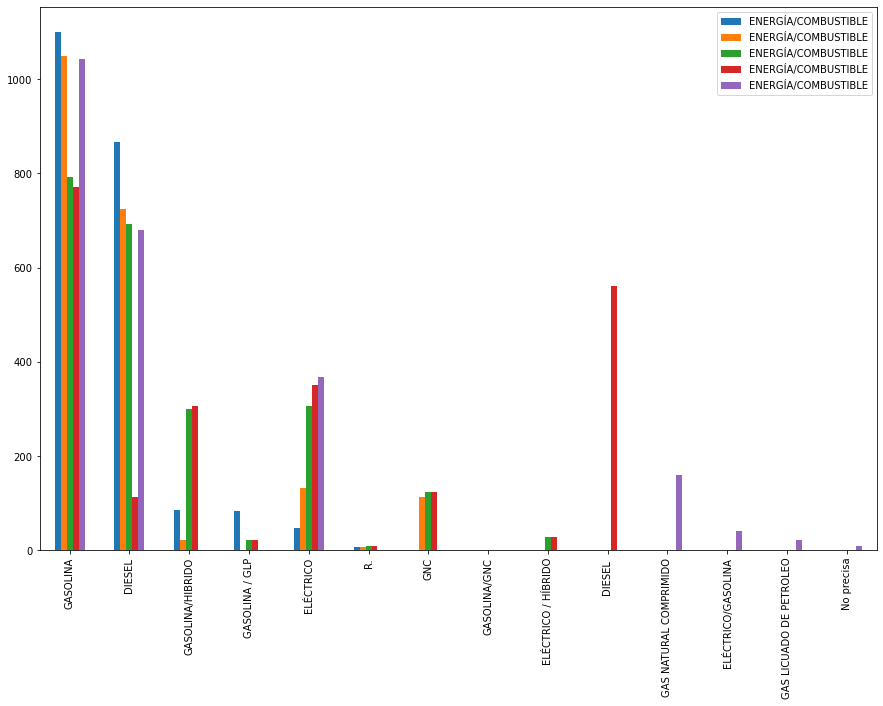

In [169]:
#TotalConso = pd.concat([TypeConso17,TypeConso18, TypeConso19, TypeConso20, TypeConso21], axis=1)
#print (TypeConso17)
#print (TypeConso20)
chartTotal = Test.plot.bar(figsize=(15,10));

print(chartTotal)